### Image classification

In [1]:
from datasets import load_dataset
ds = load_dataset("Nattakarn/fruit-and-vegetable-image-recognition")

In [2]:
len(ds["train"]) , len(ds["test"]) 

(2492, 623)

In [3]:
ds["train"] = ds["train"].shuffle(seed=42)
ds["test"] = ds["test"].shuffle(seed=42)


In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32


In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (equivalent to image_size and interpolation)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    # transforms.ToTensor() # Converts PIL Image to Tensor
])





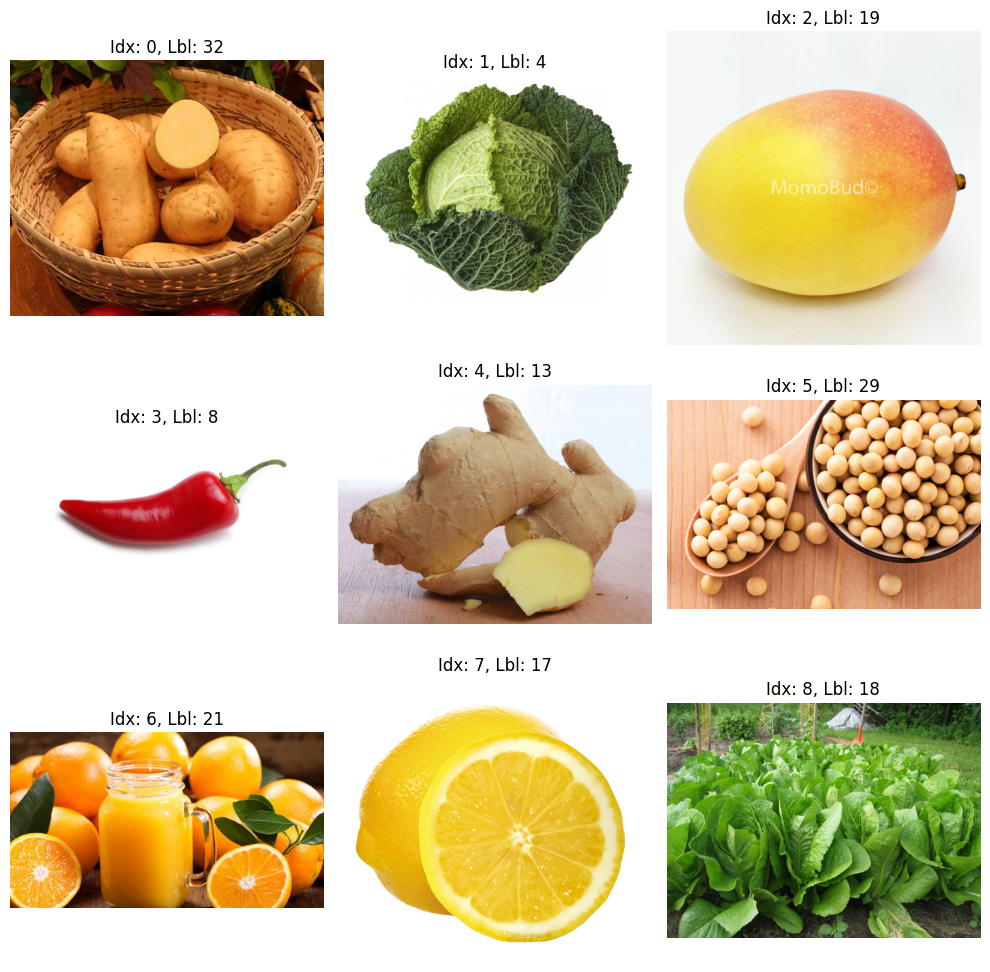

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a figure with 3x3 subplots

for i in range(9):
    example = ds["train"][i+9]
    image = example["image"]
    label = example["label"]

    # Calculate the row and column for the subplot
    row = i // 3
    col = i % 3

    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Idx: {i}, Lbl: {label}")
    axes[row, col].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

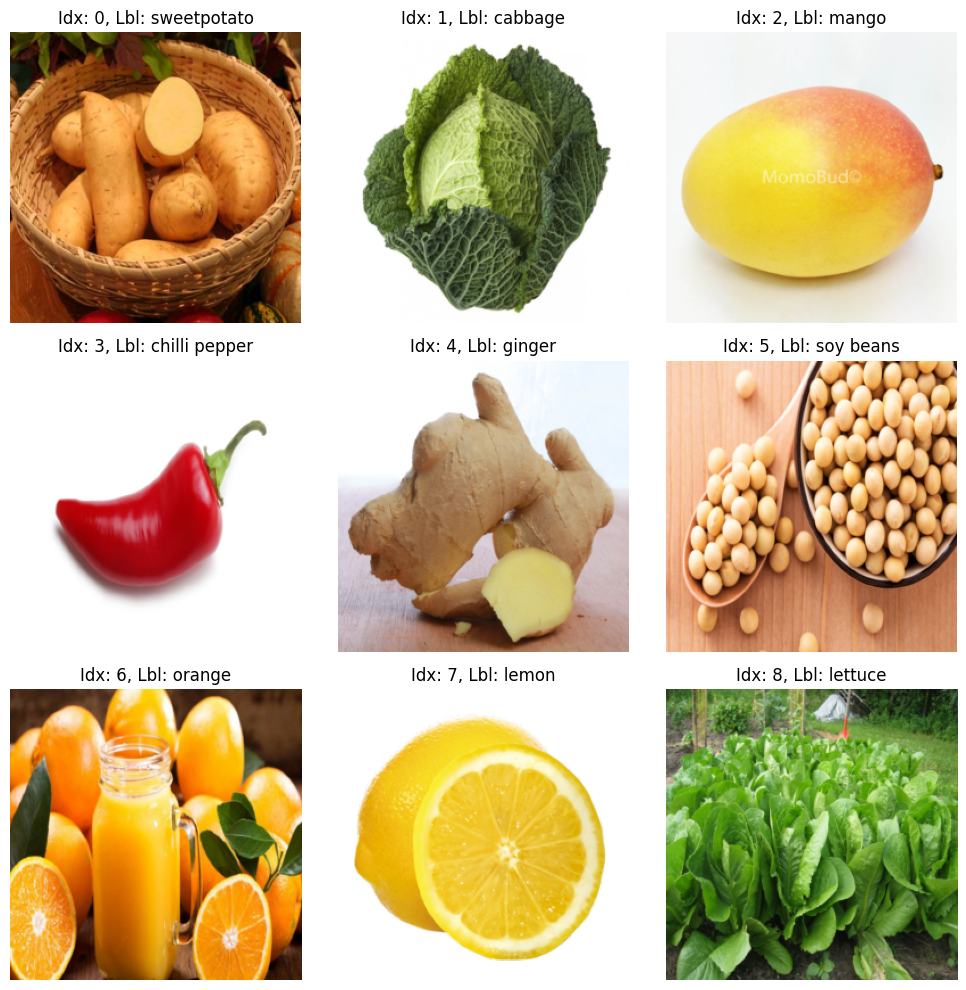

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a figure with 3x3 subplots

for i in range(9):
    example = ds["train"][i+9]
    image = transform(example["image"])
    label = ds["train"].features["label"].names[example["label"]]

    # Calculate the row and column for the subplot
    row = i // 3
    col = i % 3

    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Idx: {i}, Lbl: {label}")
    axes[row, col].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

## Creating a Model

In [30]:
transform_dataset = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor() 
])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleClassificationModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleClassificationModel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

# --- Example Usage ---

# Define the input size (number of features in your tensors)
input_size = 10

# Define the number of classes (number of possible labels)
num_classes = 3

# Create an instance of the model
model = SimpleClassificationModel(input_size, num_classes)

# Generate some dummy input tensors and labels
batch_size = 5
input_tensors = torch.randn(batch_size, input_size)
labels = torch.randint(0, num_classes, (batch_size,))

# --- Training (Simplified Example) ---

# Define a loss function
criterion = nn.CrossEntropyLoss()

# Define an optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Perform a single training step
optimizer.zero_grad()
outputs = model(input_tensors)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()

print("Model output (logits):")
print(outputs)
print("\nLabels:")
print(labels)

# To get predicted class indices:
_, predicted = torch.max(outputs, 1)
print("\nPredicted classes:")
print(predicted)